<a href="https://colab.research.google.com/github/mfilipak/ACBR-2023/blob/main/DIA7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://github.com/mfilipak/FILIPAK-DATA-SCIENCE/raw/main/DATA/2021_Time_Volume_Price.zip

--2024-03-31 22:24:57--  https://github.com/mfilipak/FILIPAK-DATA-SCIENCE/raw/main/DATA/2021_Time_Volume_Price.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mfilipak/FILIPAK-DATA-SCIENCE/main/DATA/2021_Time_Volume_Price.zip [following]
--2024-03-31 22:24:57--  https://raw.githubusercontent.com/mfilipak/FILIPAK-DATA-SCIENCE/main/DATA/2021_Time_Volume_Price.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13887076 (13M) [application/zip]
Saving to: ‘2021_Time_Volume_Price.zip.1’

2021_Time_Volume_Pr 100%[===================>]  13.24M  --.-KB/s    in 0.1s    

2024-03-31 22:24:58 (119 MB/s

In [6]:
!ls

2021_Time_Volume_Price.zip  2021_Time_Volume_Price.zip.1  sample_data


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

In [59]:
df = pd.read_csv("./2021_Time_Volume_Price.zip", index_col=0)
df = df.drop(["MeanPrice", "MinPrice", "MaxPrice", "OpenPrice"], axis=1)

In [60]:
df

,Volume,ClosePrice
Seconds,,
61045175.0,0.0,114590.0
61045176.0,0.0,114590.0
61045177.0,0.0,114590.0
61045178.0,0.0,114590.0
61045179.0,0.0,114590.0
...,...,...
72899705.0,0.0,121200.0
72899706.0,0.0,121200.0
72899707.0,0.0,121200.0


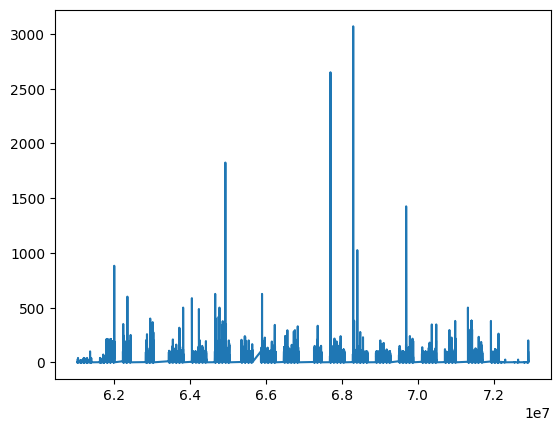

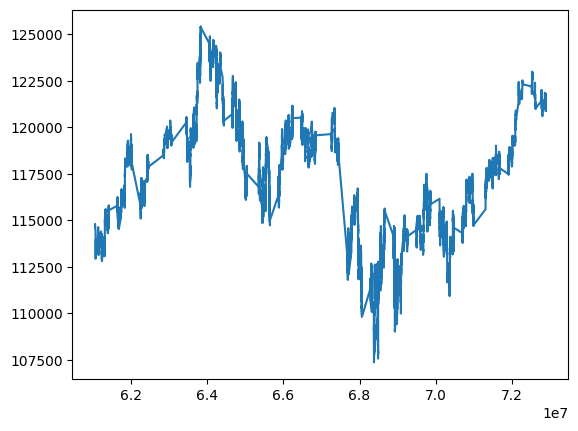

In [61]:
plt.plot(df["Volume"])
plt.show()
plt.plot(df["ClosePrice"])

In [62]:
delta_t = [0]+list(df.index[1:]-df.index[:-1])
df["DELTA_T"] = delta_t


114590.0

In [104]:
decay = 0.01
mean_volume = [0]
for v in np.array(df["Volume"]):
  mean_volume += [mean_volume[-1]*(1-decay)+decay*v]

decay = 0.00001
mean_price = [df.iloc[0]["ClosePrice"]]
for p in np.array(df["ClosePrice"]):
  mean_price += [mean_price[-1]*(1-decay)+decay*p]




In [105]:
df["MEAN_PRICE"] = mean_price[1:]
df["MEAN_VOLUME"] = mean_volume[1:]

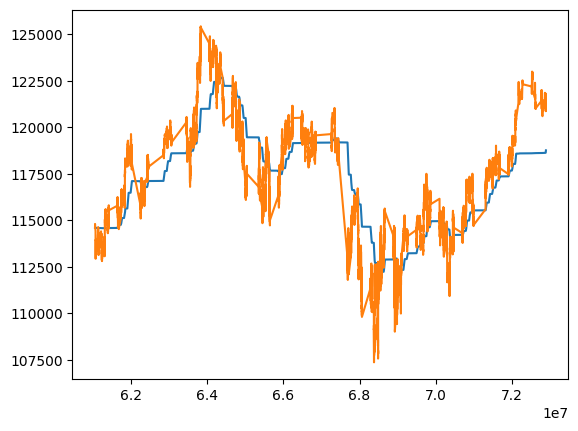

In [106]:
plt.plot(df["MEAN_PRICE"])
plt.plot(df["ClosePrice"])

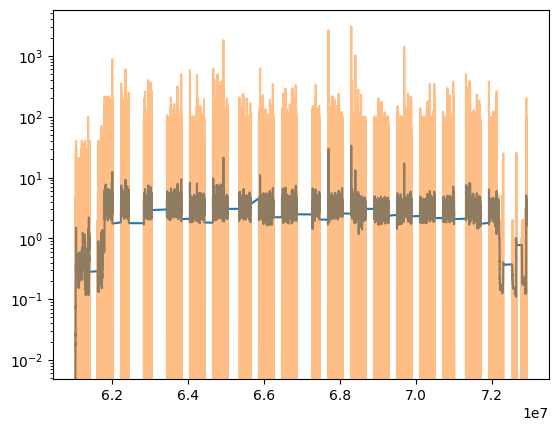

In [107]:
plt.yscale("log")
plt.plot(df["MEAN_VOLUME"])
plt.plot(df["Volume"], alpha=0.5)

In [108]:
df

,Volume,ClosePrice,DELTA_T,MEAN_PRICE,MEAN_VOLUME
Seconds,,,,,
61045175.0,0.0,114590.0,0.0,114590.000000,0.000000
61045176.0,0.0,114590.0,1.0,114590.000000,0.000000
61045177.0,0.0,114590.0,1.0,114590.000000,0.000000
61045178.0,0.0,114590.0,1.0,114590.000000,0.000000
61045179.0,0.0,114590.0,1.0,114590.000000,0.000000
...,...,...,...,...,...
72899705.0,0.0,121200.0,1.0,118761.903649,1.988666
72899706.0,0.0,121200.0,1.0,118761.928030,1.968779
72899707.0,0.0,121200.0,1.0,118761.952411,1.949092


,Volume,ClosePrice,DELTA_T
Seconds,,,
61045175.0,0.0,114590.0,0.0
61045176.0,0.0,114590.0,1.0
61045177.0,0.0,114590.0,1.0
61045178.0,0.0,114590.0,1.0
61045179.0,0.0,114590.0,1.0
...,...,...,...
72899705.0,0.0,121200.0,1.0
72899706.0,0.0,121200.0,1.0
72899707.0,0.0,121200.0,1.0


In [1]:
!pip install dlib
import dlib

In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=bf92497fed846044879f729c36903e441c21bf9c64ed4fdbca7176ec9f839fb3
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [3]:
import face_recognition

In [4]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-a.tgz

--2024-03-31 23:29:49--  http://vis-www.cs.umass.edu/lfw/lfw-a.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14486641 (14M) [application/x-gzip]
Saving to: ‘lfw-a.tgz’

lfw-a.tgz           100%[===================>]  13.82M  1.67MB/s    in 10s     

2024-03-31 23:30:00 (1.32 MB/s) - ‘lfw-a.tgz’ saved [14486641/14486641]



In [9]:
!tar -xzf lfw-a.tgz

In [12]:
all_files = glob("./lfw/**/*.*", recursive=True)

In [31]:
faces = {}
for f in all_files[:]:
  k = f.split(os.sep)[-2]
  try:
    faces[k]+=[f]
  except:
    faces[k]=[f]


In [32]:
for k in list(faces.keys()):
  if len(faces[k])<2:
    faces.pop(k, None)
    print(k)

Amy_Gale
Alexandre_Herchcovitch
Amy_Smart
Art_Cooper
Alexis_Dennisoff
Amy_Cotton
Angela_Mascia-Frye
Andy_Graves
Alfred_Ford
Ana_Paula_Gerard
Ahmed_Ibrahim_Bilal
Alicia_Witt
Andy_Wisecarver
Alan_Greer
Ataollah_Mohajerani
Alexa_Loren
Alex_Holmes
Akiko_Morigami
Agbani_Darego
Anja_Paerson
Anthony_Lee_Johnson
Aaron_Patterson
Angelo_Genova
Alma_Powell
Alex_King
Allan_Kemakeza
Andy_North
Alex_Popov
Amy_Redford
Astou_Ndiaye-Diatta
Alan_Tang_Kwong-wing
Ally_Sheedy
Alexandra_Pelosi
Alex_Ferguson
Andrew_Caldecott
Albaro_Recoba
Annika_Sorenstam
Adriana_Lima
Ascencion_Barajas
Alastair_Johnston
Andre_Bucher
Abdel_Aziz_Al-Hakim
Arthur_Martinez
Andrea_Kiser
Andy_Garcia
Adisai_Bodharamik
Arnie_Boehm
Ahmed_Ghazi
Andrei_Nikolishin
Amr_Moussa
Alex_Zanardi
Atom_Egoyan
Aaron_Pena
Anthony_Ervin
Adam_Mair
Abbas_Kiarostami
Ainsworth_Dyer
Armando_Carrillo
Aiysha_Smith
Alberto_Acosta
Anthony_Garotinho
Annie_Chaplin
Andy_Griffith
Akmal_Taher
Alessandra_Cerna
Anzori_Kikalishvili
Ahmad_Jbarah
Anjum_Hussain
Ali_Ahme

In [33]:
faces.keys()

dict_keys(['Arturo_Gatti', 'Andre_Agassi', 'Augusto_Roa_Bastos', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Anna_Nicole_Smith', 'Ashanti', 'Al_Gore', 'Atal_Bihari_Vajpayee', 'Ana_Guevara', 'Adam_Sandler', 'Aron_Ralston', 'Arminio_Fraga', 'Ai_Sugiyama', 'Ali_Naimi', 'Art_Howe', 'Alicia_Silverstone', 'Andy_Hebb', 'Alexander_Downer', 'Annette_Lu', 'Annette_Bening', 'Alex_Penelas', 'Asa_Hutchinson', 'Ari_Fleischer', 'Anne_McLellan', 'Anders_Fogh_Rasmussen', 'Allison_Janney', 'Alexander_Rumyantsev', 'Alexander_Losyukov', 'Adrien_Brody', 'Ahmad_Masood', 'Amelie_Mauresmo', 'Adrian_McPherson', 'Amber_Tamblyn', 'Antonio_Palocci', 'Albrecht_Mentz', 'Al_Pacino', 'Alberto_Ruiz_Gallardon', 'Anthony_LaPaglia', 'Alec_Baldwin', 'Adrian_Nastase', 'Ali_Khamenei', 'Abdullah_Gul', 'Aung_San_Suu_Kyi', 'Ana_Palacio', 'Akbar_Hashemi_Rafsanjani', 'Alberto_Fujimori', 'Arianna_Huffington', 'Antonio_Banderas', 'Anne_Krueger', 'Ahmed_Chalabi', 'Antony_Leung', 'Anthony_Hopkins', 'Arnold_Schwarzenegger', 'Alice_Fisher', 'Ali